In [1]:
#Load dependencies
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Define data files to import
btcrawdata = '../data/rawdata/btcraw.csv'
ltcrawdata = '../data/rawdata/ltcraw.csv'
ethrawdata = '../data/rawdata/ethraw.csv'

#Read data files into Panda data frames
btcdata = pd.read_csv(btcrawdata)
ltcdata = pd.read_csv(ltcrawdata)
ethdata = pd.read_csv(ethrawdata)

In [2]:
btcdata.columns

Index(['date', 'AdrActCnt', 'BlkCnt', 'BlkSizeByte', 'BlkSizeMeanByte',
       'CapMVRVCur', 'CapMrktCurUSD', 'CapRealUSD', 'DiffMean', 'FeeMeanNtv',
       'FeeMeanUSD', 'FeeMedNtv', 'FeeMedUSD', 'FeeTotNtv', 'FeeTotUSD',
       'IssContNtv', 'IssContPctAnn', 'IssContUSD', 'IssTotNtv', 'IssTotUSD',
       'NVTAdj', 'NVTAdj90', 'PriceBTC', 'PriceUSD', 'ROI1yr', 'ROI30d',
       'SplyCur', 'TxCnt', 'TxTfrCnt', 'TxTfrValAdjNtv', 'TxTfrValAdjUSD',
       'TxTfrValMeanNtv', 'TxTfrValMeanUSD', 'TxTfrValMedNtv',
       'TxTfrValMedUSD', 'TxTfrValNtv', 'TxTfrValUSD', 'VtyDayRet180d',
       'VtyDayRet30d', 'VtyDayRet60d'],
      dtype='object')

In [18]:
ltcdata.columns

Index(['date', 'AdrActCnt', 'BlkCnt', 'BlkSizeByte', 'BlkSizeMeanByte',
       'CapMVRVCur', 'CapMrktCurUSD', 'CapRealUSD', 'DiffMean', 'FeeMeanNtv',
       'FeeMeanUSD', 'FeeMedNtv', 'FeeMedUSD', 'FeeTotNtv', 'FeeTotUSD',
       'IssContNtv', 'IssContPctAnn', 'IssContUSD', 'IssTotNtv', 'IssTotUSD',
       'NVTAdj', 'NVTAdj90', 'PriceBTC', 'PriceUSD', 'ROI1yr', 'ROI30d',
       'SplyCur', 'TxCnt', 'TxTfrCnt', 'TxTfrValAdjNtv', 'TxTfrValAdjUSD',
       'TxTfrValMeanNtv', 'TxTfrValMeanUSD', 'TxTfrValMedNtv',
       'TxTfrValMedUSD', 'TxTfrValNtv', 'TxTfrValUSD', 'VtyDayRet180d',
       'VtyDayRet30d', 'VtyDayRet60d'],
      dtype='object')

In [19]:
ethdata.columns

Index(['date', 'AdrActCnt', 'BlkCnt', 'BlkSizeByte', 'BlkSizeMeanByte',
       'CapMrktCurUSD', 'DiffMean', 'FeeMeanNtv', 'FeeMeanUSD', 'FeeMedNtv',
       'FeeMedUSD', 'FeeTotNtv', 'FeeTotUSD', 'IssContNtv', 'IssContPctAnn',
       'IssContUSD', 'IssTotNtv', 'IssTotUSD', 'NVTAdj', 'NVTAdj90',
       'PriceBTC', 'PriceUSD', 'ROI1yr', 'ROI30d', 'SplyCur', 'TxCnt',
       'TxTfrCnt', 'TxTfrValAdjNtv', 'TxTfrValAdjUSD', 'TxTfrValMeanNtv',
       'TxTfrValMeanUSD', 'TxTfrValMedNtv', 'TxTfrValMedUSD', 'TxTfrValNtv',
       'TxTfrValUSD', 'VtyDayRet180d', 'VtyDayRet30d', 'VtyDayRet60d'],
      dtype='object')

In [20]:
btcdata['date'] = pd.to_datetime(btcdata['date'])
btcdata['year'],btcdata['month'],btcdata['day'],btcdata['dayofyear'] = btcdata['date'].dt.year.map('{:.0f}'.format),btcdata['date'].dt.month.map('{:.0f}'.format),btcdata['date'].dt.day.map('{:.0f}'.format),btcdata['date'].dt.dayofyear.map('{:.0f}'.format)
tbtcprice = btcdata[['year','month','day','dayofyear','PriceUSD']]
btcprice = tbtcprice.groupby(['year','dayofyear'])['PriceUSD'].sum().unstack(0)
btcprice.reset_index(inplace=True)
btcprice.columns.name=''
btcprice['dayofyear'] = pd.to_numeric(btcprice['dayofyear'])
bitcoin = btcprice.sort_values('dayofyear')
bitcoin

,dayofyear,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,1,NaN,0.000000,0.300000,5.294843,13.331371,752.404550,314.776472,434.678006,997.257358,13464.653610,3808.117832
111,2,NaN,0.000000,0.299970,5.204878,13.280607,784.954921,315.942732,434.439877,1017.077886,14754.322200,3898.197488
222,3,0.0,0.000000,0.295000,4.870509,13.384081,807.222939,285.647310,430.136180,1032.609053,15010.286160,3784.388635
300,4,0.0,0.000000,0.298950,5.585706,13.451721,828.602063,263.334575,433.448971,1134.496445,15070.300800,3827.524594
311,5,0.0,0.000000,0.298916,6.874001,13.459407,902.487380,275.003851,432.669503,1000.498129,16997.227410,3798.613955
322,6,0.0,0.000000,0.298000,6.683317,13.504497,914.459961,287.549521,430.677870,892.463956,17103.589280,4045.993775
333,7,0.0,0.000000,0.320000,6.796228,13.556062,803.351796,297.535565,459.208940,903.453284,16231.695000,4001.018278
344,8,0.0,0.000000,0.322900,7.096651,13.780351,820.690009,284.342392,454.134424,912.484997,14937.415090,3992.622789
355,9,0.0,0.000000,0.323000,6.288538,13.820955,831.334751,292.501115,449.845216,903.508667,14378.586220,4004.259036
1,10,0.0,0.000000,0.326590,6.528475,14.123173,853.298855,276.230532,448.580216,906.498947,14669.088270,3627.903450


Text(0, 0.5, 'Prices')

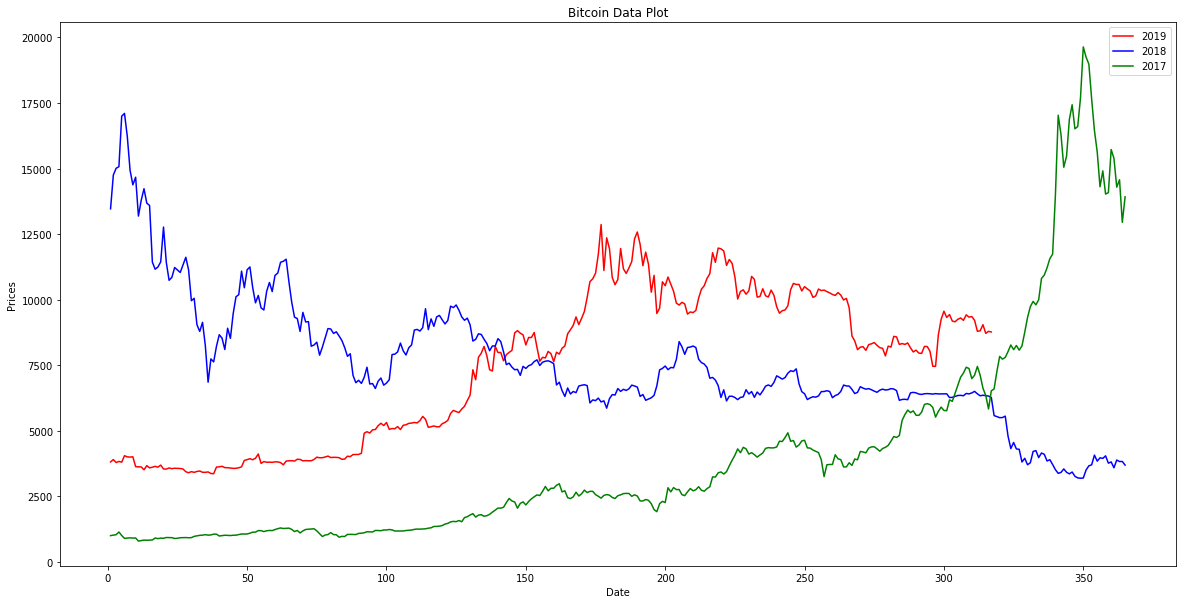

In [22]:
plt.figure(figsize=(20,10)) 
plt.plot(bitcoin['dayofyear'],bitcoin['2019'],c='red',label='2019')
plt.plot(bitcoin['dayofyear'],bitcoin['2018'],c='blue',label='2018')
plt.plot(bitcoin['dayofyear'],bitcoin['2017'],c='green',label='2017')
plt.legend(loc='best')
plt.title('Bitcoin Data Plot')
plt.xlabel('Date')
plt.ylabel('Prices')